In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

In [ ]:
########## ---------- Analysis-----------------#####

In [3]:
output = pd.read_excel('./../data_output/Base1.xlsx')
output2 = pd.read_excel('./../data_output/Base2.xlsx')
output3 = pd.read_excel('./../data_output/Base3.xlsx')

In [ ]:
###histogram of the operation of the ac units per hour

In [4]:
output['Fecha'] = pd.to_datetime(output['Fecha'])

df = output.copy()
df['hour'] = df['Fecha'].dt.hour
on_data = df.loc[df['Encendido'] == 'On'].reset_index(drop=True).copy()
on_data = on_data[['Encendido', 'hour']]
on_data

/tmp/ipykernel_982422/3044113249.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  output['Fecha'] = pd.to_datetime(output['Fecha'])


,Encendido,hour
0,On,6
1,On,8
2,On,8
3,On,9
4,On,9
...,...,...
86966,On,19
86967,On,20
86968,On,20
86969,On,20


In [5]:
hourly_counts = on_data['hour'].value_counts().sort_index()
hourly_counts

hour
0     1064
1      846
2      844
3      706
4      665
5     1335
6     4565
7     4259
8     4559
9     4897
10    5054
11    5091
12    5183
13    5206
14    5217
15    5242
16    5210
17    5194
18    5136
19    5058
20    4792
21    4020
22    2020
23     808
Name: count, dtype: int64

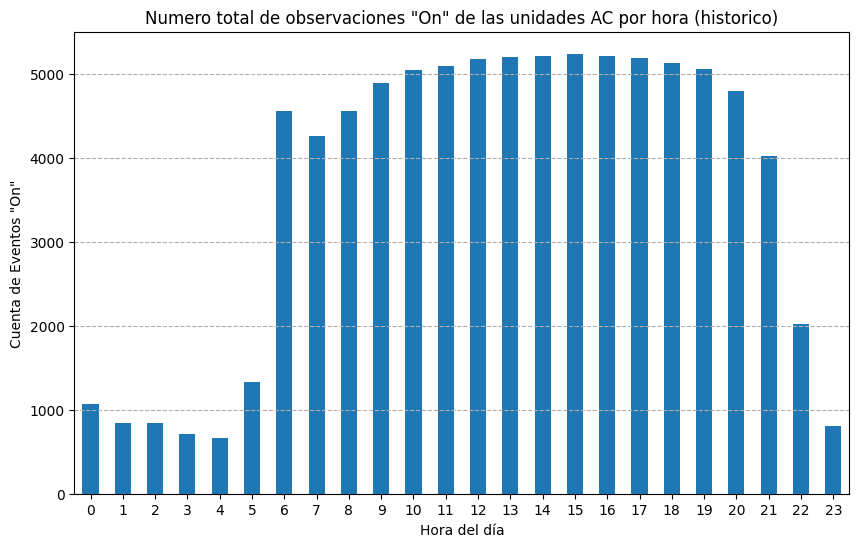

In [6]:
plt.figure(figsize=(10,6))
hourly_counts.plot(kind='bar')
plt.title('Numero total de observaciones "On" de las unidades AC por hora (historico)')
plt.xlabel('Hora del día')
plt.ylabel('Cuenta de Eventos "On"')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

In [7]:
###plot of the average ac energy consumption per hour

In [8]:
df = output2.copy()
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour']=df['date_time'].dt.hour
avg_ac_energy_hour = df.groupby('hour', as_index=False).agg(ac_avg_energy = ('AC_energy(kWh)', 'mean'))
avg_ac_energy_hour

,hour,ac_avg_energy
0,0,36.119661
1,1,38.698644
2,2,35.185593
3,3,32.388305
4,4,26.526833
5,5,27.261833
6,6,98.052167
7,7,126.681017
8,8,76.679833
9,9,45.666102


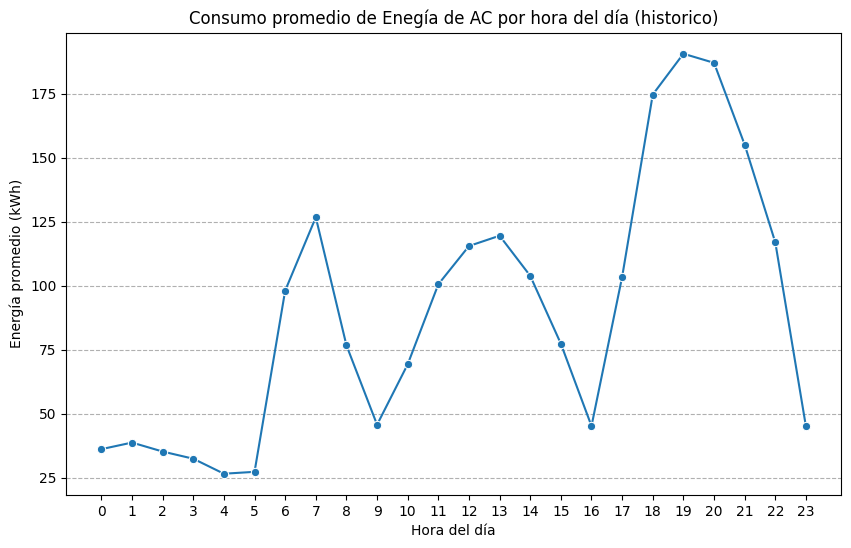

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_ac_energy_hour, x='hour', y='ac_avg_energy', marker='o')
plt.title('Consumo promedio de Enegía de AC por hora del día (historico)')
plt.xlabel('Hora del día')
plt.ylabel('Energía promedio (kWh)')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--')
plt.show()

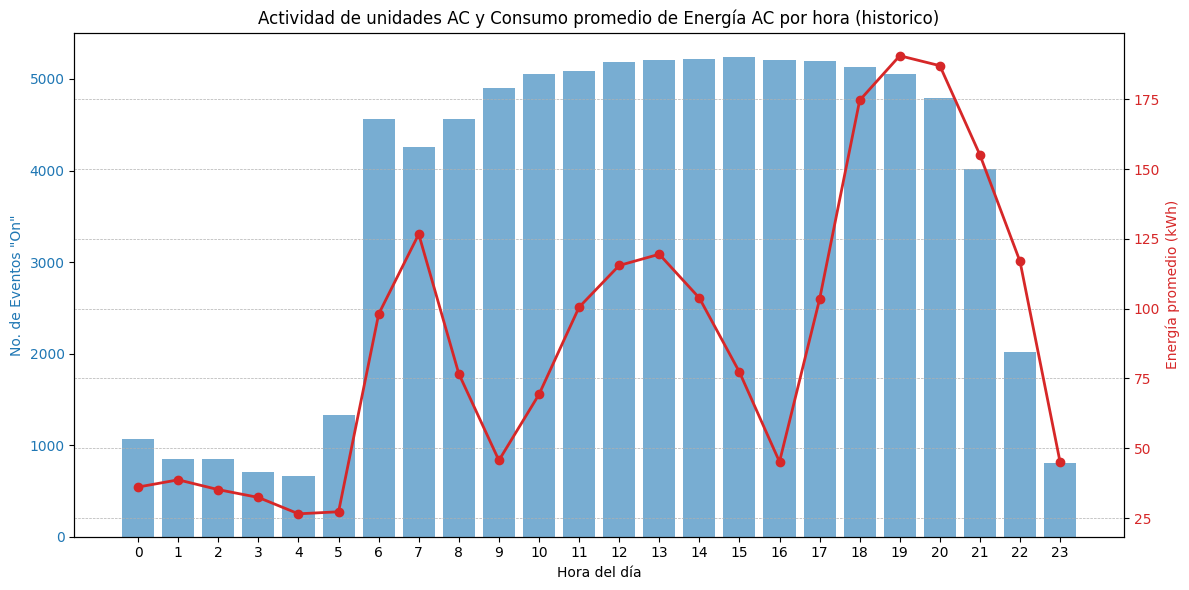

In [110]:
#putting the plots together
fig, ax1 = plt.subplots(figsize=(12, 6))

#primary axis
color_count = 'tab:blue'
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('No. de Eventos "On"', color = color_count)
ax1.bar(avg_ac_energy_hour['hour'], hourly_counts, width=0.8, color=color_count, alpha=0.6, label = 'Numero de Eventos "On"')
ax1.tick_params(axis='y', labelcolor=color_count)
ax1.set_xticks(avg_ac_energy_hour['hour'])

##secondary axis
ax2 = ax1.twinx()
color_energy='tab:red'
ax2.set_ylabel('Energía promedio (kWh)', color = color_energy)
ax2.plot(avg_ac_energy_hour['hour'], avg_ac_energy_hour['ac_avg_energy'], color=color_energy, marker='o',
         linestyle='-', linewidth=2, label='Energía promedio')
ax2.tick_params(axis='y', labelcolor=color_energy)

#title
plt.title('Actividad de unidades AC y Consumo promedio de Energía AC por hora (historico)')
fig.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)


plt.savefig('./../figures/activity_and_energy_ac.png')
plt.show()

In [11]:
####Analysis of AC activity per day

In [12]:
df = output.copy()
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['date']= df['Fecha'].dt.date
daily_total_counts = df.groupby('date', as_index=False).agg(total_events_per_day = ('Encendido', 'count'))
on_events_per_day = df.loc[df['Encendido'] == 'On'].groupby('date', as_index=False).agg(on_events = ('Encendido', 'count'))
daily_stats = daily_total_counts.merge(on_events_per_day, on='date', how='inner')
daily_stats

,date,total_events_per_day,on_events
0,2025-08-01,1728,1096
1,2025-08-02,1728,1088
2,2025-08-03,1728,1143
3,2025-08-04,1728,1148
4,2025-08-05,1728,1160
...,...,...,...
70,2025-10-10,1728,754
71,2025-10-11,1728,815
72,2025-10-12,1728,812
73,2025-10-13,1728,927


In [13]:
daily_stats['on_rate'] = daily_stats.on_events/daily_stats.total_events_per_day
daily_stats

,date,total_events_per_day,on_events,on_rate
0,2025-08-01,1728,1096,0.634259
1,2025-08-02,1728,1088,0.629630
2,2025-08-03,1728,1143,0.661458
3,2025-08-04,1728,1148,0.664352
4,2025-08-05,1728,1160,0.671296
...,...,...,...,...
70,2025-10-10,1728,754,0.436343
71,2025-10-11,1728,815,0.471644
72,2025-10-12,1728,812,0.469907
73,2025-10-13,1728,927,0.536458


In [14]:
#computing mean and std
mean_rate = daily_stats['on_rate'].mean()
std_rate = daily_stats['on_rate'].std()

#defining anomaly threshold (e.g. mean +  2*std)
anomaly_threshold_plus= mean_rate + 2*std_rate
anomaly_threshold_minus = mean_rate - 2*std_rate
daily_stats['is_anomaly'] = (daily_stats['on_rate'] > anomaly_threshold_plus) | (daily_stats['on_rate'] < anomaly_threshold_minus)
anomaly_days = daily_stats.loc[daily_stats['is_anomaly']]
anomaly_days

,date,total_events_per_day,on_events,on_rate,is_anomaly
26,2025-08-27,1728,659,0.381366,True
69,2025-10-09,1728,841,0.486690,True
70,2025-10-10,1728,754,0.436343,True
71,2025-10-11,1728,815,0.471644,True
72,2025-10-12,1728,812,0.469907,True


In [15]:
daily_stats['date'] = pd.to_datetime(daily_stats['date'])
daily_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  75 non-null     datetime64[ns]
 1   total_events_per_day  75 non-null     int64         
 2   on_events             75 non-null     int64         
 3   on_rate               75 non-null     float64       
 4   is_anomaly            75 non-null     bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 2.5 KB


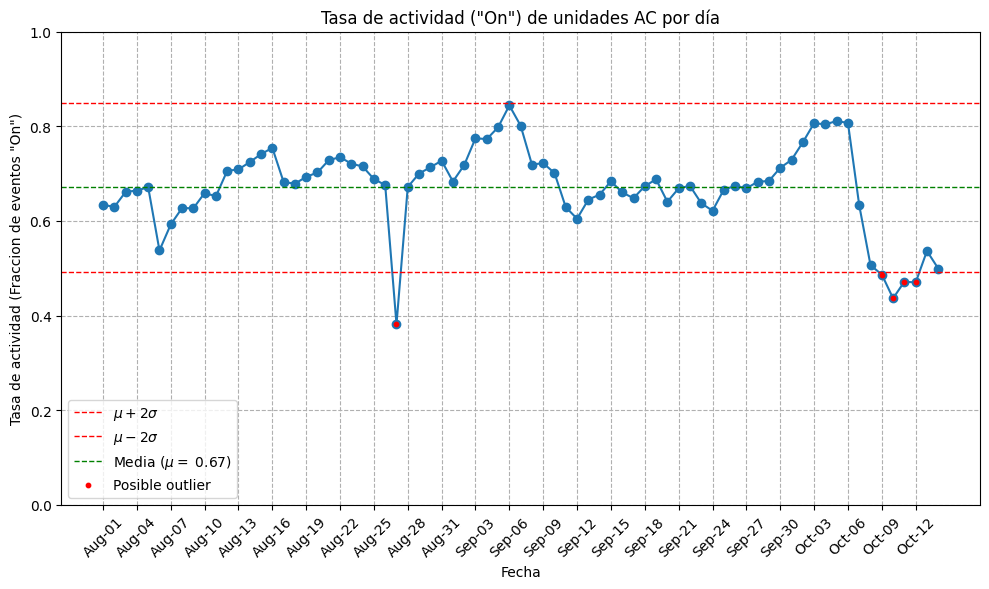

In [111]:
plt.figure(figsize=(10,6))
ax = plt.gca()

plt.plot(daily_stats['date'], daily_stats['on_rate'], marker='o', linestyle = '-')
plt.axhline(anomaly_threshold_plus, color='red', linestyle='--', linewidth=1, label='$\\mu + 2\\sigma$')
plt.axhline(anomaly_threshold_minus, color='red', linestyle='--', linewidth=1, label='$\\mu - 2\\sigma$')
plt.axhline(mean_rate, color = 'green', linestyle='--', linewidth=1, label=f'Media ($\\mu=$ {mean_rate:.2f})')

plt.scatter(anomaly_days['date'], 
            anomaly_days['on_rate'],
            color='red',
            s=10,# size
            zorder = 5, #ensures point is on top of the line
            label='Posible outlier')
    
plt.title('Tasa de actividad ("On") de unidades AC por día')
plt.xlabel('Fecha')
plt.ylabel('Tasa de actividad (Fraccion de eventos "On")')
plt.ylim(0,1)

ax.set_xticks(daily_stats['date'].iloc[::3])
ax.xaxis.set_major_formatter(DateFormatter('%b-%d'))
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--')
plt.grid(axis='x', linestyle='--')

plt.tight_layout()
plt.legend()
plt.savefig('./../figures/day_activity.png')
plt.show()

In [ ]:
###Analysis between temperture and energy consumption

In [20]:
output3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            1801 non-null   object 
 1   general_energy(kWh)  1801 non-null   float64
 2   AC_energy(kWh)       1413 non-null   float64
 3   celcius              1801 non-null   object 
dtypes: float64(2), object(2)
memory usage: 56.4+ KB


In [30]:
output3['celcius'] = pd.to_numeric(output3['celcius'], errors='coerce')
output3['date_time'] = pd.to_datetime(output3['date_time'])
output3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            1801 non-null   datetime64[ns]
 1   general_energy(kWh)  1801 non-null   float64       
 2   AC_energy(kWh)       1413 non-null   float64       
 3   celcius              1760 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 56.4 KB


In [70]:
output3['date'] = output3['date_time'].dt.date
daily_ener_temp = output3.groupby('date', as_index =False)[['AC_energy(kWh)', 'celcius']].mean()
temp_energy = daily_ener_temp.dropna().reset_index(drop=True).rename(
    columns = {'AC_energy(kWh)':'ac_energy', 'celcius':'temperature'})
temp_energy.head()

,date,ac_energy,temperature
0,2025-08-17,120.805000,32.880417
1,2025-08-18,101.712083,33.130000
2,2025-08-19,91.212500,34.125000
3,2025-08-20,91.942917,34.282917
4,2025-08-21,105.654167,34.322917


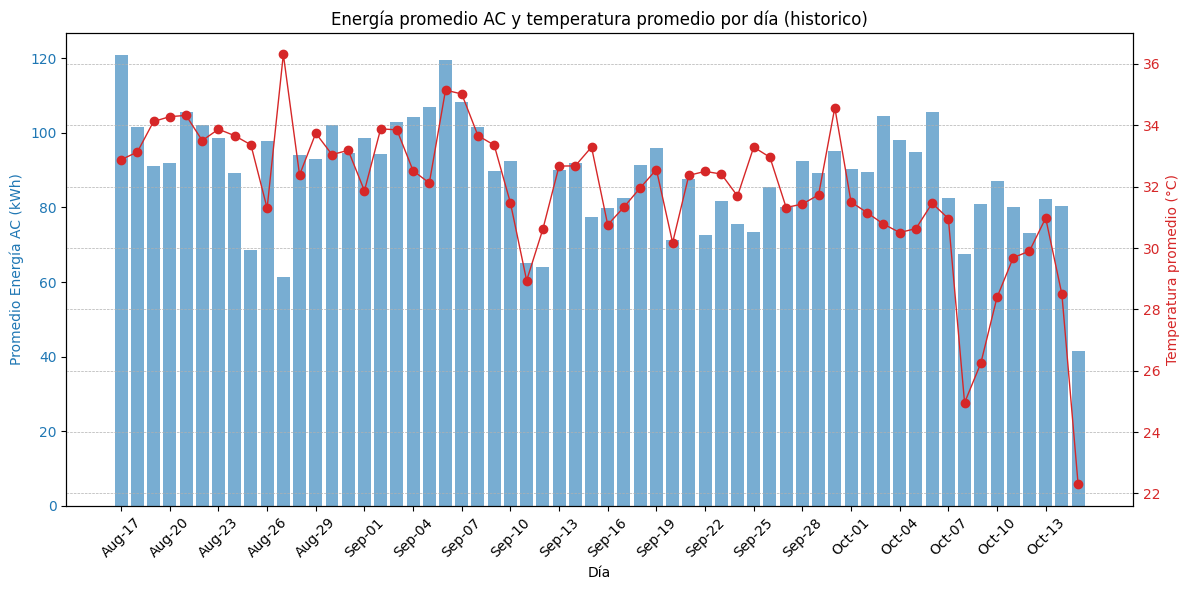

In [118]:
#putting the plots together
fig, ax1 = plt.subplots(figsize=(12, 6))

#primary axis
color_energy = 'tab:blue'
ax1.set_xlabel('Día')
ax1.set_ylabel('Promedio Energía AC (kWh)', color = color_count)
ax1.bar(temp_energy['date'], temp_energy['ac_energy'], width=0.8, 
        color=color_count, alpha=0.6, label = 'Numero de Eventos "On"')
ax1.tick_params(axis='y', labelcolor=color_energy)
ax1.set_xticks(temp_energy['date'])

##secondary axis
ax2 = ax1.twinx()
color_temp='tab:red'
ax2.set_ylabel('Temperatura promedio (°C)', color = color_temp)
ax2.plot(temp_energy['date'], temp_energy['temperature'], color=color_temp, marker='o',
         linestyle='-', linewidth=1, label='Temperatura promedio')
ax2.tick_params(axis='y', labelcolor=color_temp)

ax1.set_xticks(temp_energy['date'].iloc[::3])
ax1.xaxis.set_major_formatter(DateFormatter('%b-%d'))
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
#plt.xticks(rotation=45)

#title
plt.grid(axis='y', linestyle='--', linewidth=0.5)
#plt.grid(axis='x', linestyle='--')

plt.title('Energía promedio AC y temperatura promedio por día (historico)')
fig.tight_layout()

plt.savefig('./../figures/energy_and_temp.png')
plt.show()

In [83]:
temp_df = output3.groupby('date', as_index=False).agg(temp = ('celcius', 'mean'))
temp_df.head()

,date,temp
0,2025-08-01,32.153750
1,2025-08-02,33.212083
2,2025-08-03,32.964167
3,2025-08-04,33.402917
4,2025-08-05,34.125417


In [81]:
temp_df['date'] = pd.to_datetime(temp_df['date'])
daily_stats = daily_stats.merge(temp_df, how='left', on='date')

In [84]:
daily_stats.head()

,date,total_events_per_day,on_events,on_rate,is_anomaly,temp
0,2025-08-01,1728,1096,0.634259,False,32.153750
1,2025-08-02,1728,1088,0.629630,False,33.212083
2,2025-08-03,1728,1143,0.661458,False,32.964167
3,2025-08-04,1728,1148,0.664352,False,33.402917
4,2025-08-05,1728,1160,0.671296,False,34.125417


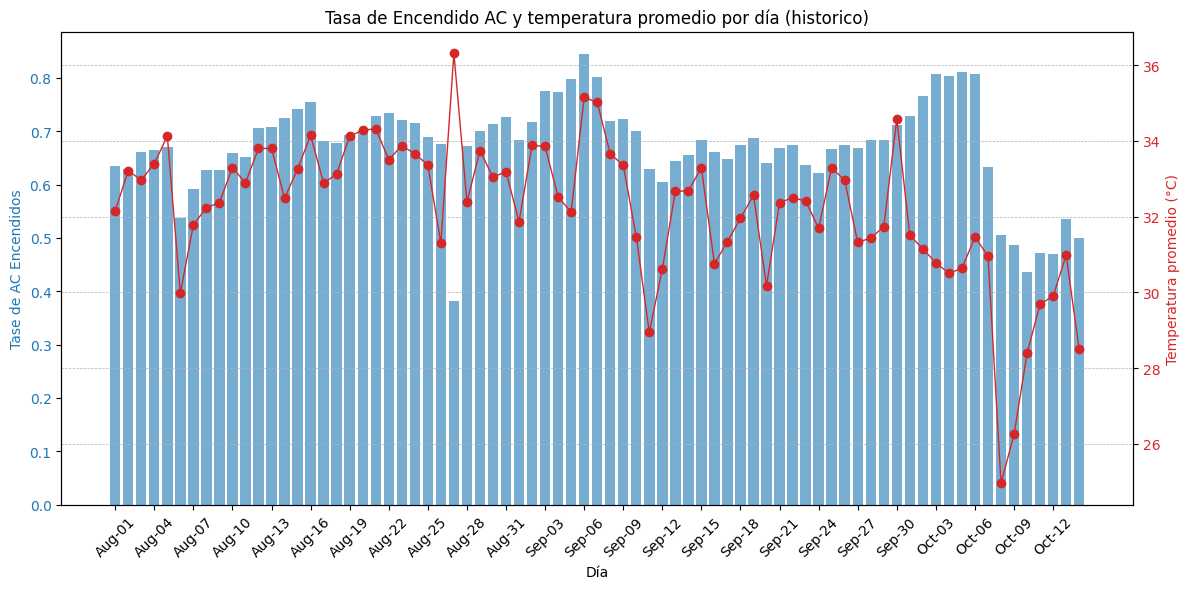

In [121]:

fig, ax1 = plt.subplots(figsize=(12, 6))

#primary axis
color_energy = 'tab:blue'
ax1.set_xlabel('Día')
ax1.set_ylabel('Tase de AC Encendidos', color = color_count)
ax1.bar(daily_stats['date'], daily_stats['on_rate'], width=0.8, 
        color=color_count, alpha=0.6, label = 'Tasa de AC Encendidos')
ax1.tick_params(axis='y', labelcolor=color_energy)
ax1.set_xticks(daily_stats['date'])

##secondary axis
ax2 = ax1.twinx()
color_temp='tab:red'
ax2.set_ylabel('Temperatura promedio (°C)', color = color_temp)
ax2.plot(daily_stats['date'], daily_stats['temp'], color=color_temp, marker='o',
         linestyle='-', linewidth=1, label='Temperatura promedio')
ax2.tick_params(axis='y', labelcolor=color_temp)

ax1.set_xticks(daily_stats['date'].iloc[::3])
ax1.xaxis.set_major_formatter(DateFormatter('%b-%d'))
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
#plt.xticks(rotation=45)

#title
plt.grid(axis='y', linestyle='--', linewidth=0.5)
#plt.grid(axis='x', linestyle='--')

plt.title('Tasa de Encendido AC y temperatura promedio por día (historico)')
fig.tight_layout()

plt.savefig('./../figures/activity_and_temp.png')
plt.show()

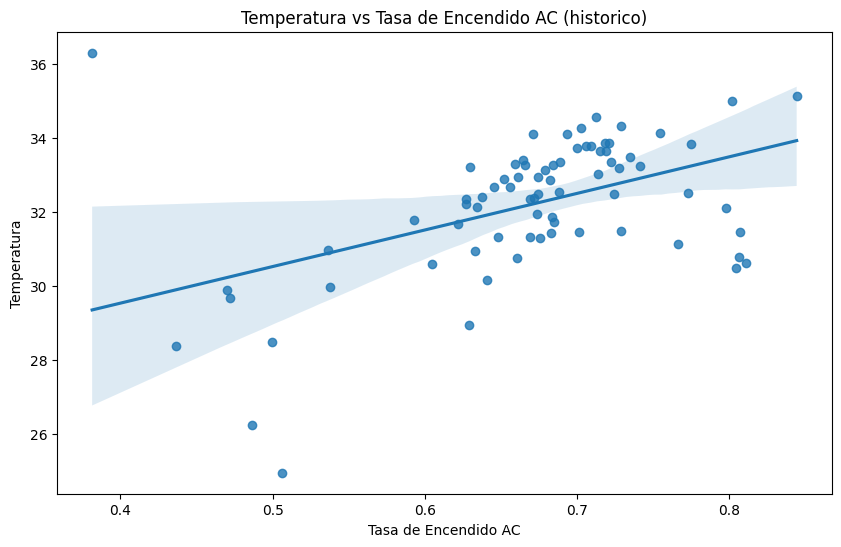

,on_rate,temp
on_rate,1.000000,0.467184
temp,0.467184,1.000000


In [124]:
plt.figure(figsize=(10,6))
sns.regplot(x='on_rate', y='temp', data=daily_stats)
plt.title('Temperatura vs Tasa de Encendido AC (historico)')
plt.xlabel('Tasa de Encendido AC')
plt.ylabel('Temperatura')
#plt.xticks(range(0,24))
#plt.grid(axis='y', linestyle='--')
plt.savefig('./../figures/regression.png')
plt.show()

daily_stats[['on_rate', 'temp']].corr()

,ac_energy,temperature
ac_energy,1.000000,0.531621
temperature,0.531621,1.000000


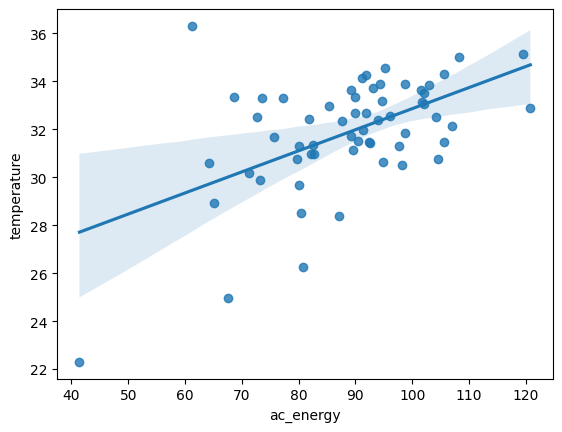

In [107]:
sns.regplot(x='ac_energy', y='temperature', data=temp_energy)
temp_energy[['ac_energy', 'temperature']].corr()

In [126]:
pd.__version__

'2.1.4'